In [152]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

In [153]:
A = np.loadtxt('data/siteA.txt')
B = np.loadtxt('data/siteB.txt')

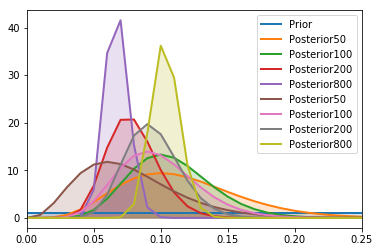

In [157]:
x = np.arange(0, 1.01, 0.01)
y = scs.beta(1,1).pdf(x)

def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    
plot_with_fill(x,y,'Prior')
group = [A,B]
lth = [50,100,200,800]
for gp in group:
    for l in lth:
        plot_with_fill(x, scs.beta(1 + sum(gp[:l]), 1 + len(gp[:l]) - sum(gp[:l])).pdf(x), 'Posterior'+str(l))

plt.xlim(0,0.25)
plt.legend()
plt.show()

In [ ]:
sum(A[:50])

In [ ]:
Bsample = np.random.beta(1 + sum(B), 1 + len(B) - sum(B),10000)
Asample = np.random.beta(1 + sum(A), 1 + len(A) - sum(A),10000)

In [ ]:
sum([(i > j) * 1 for (i,j) in zip(Bsample, Asample)])/10000

In [ ]:
(scs.beta(1 + sum(B), 1 + len(B) - sum(B)).ppf(0.025),scs.beta(1 + sum(B), 1 + len(B) - sum(B)).ppf(0.975))

In [ ]:
(scs.beta(1 + sum(A), 1 + len(A) - sum(A)).ppf(0.025),scs.beta(1 + sum(A), 1 + len(A) - sum(A)).ppf(0.975))

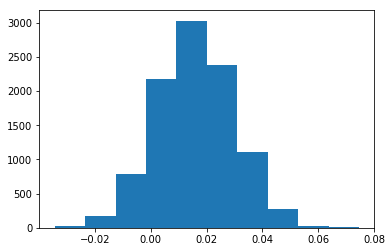

In [158]:
plt.hist(Bsample - Asample - 0.02)
plt.show()